
# UNHCR Forcibly Displaced Populations Casptone Project

## K-Nearest Neighbours

---


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import warnings

In [39]:
warnings.filterwarnings('ignore')

### Load the data

In [5]:
df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')
df.head() 

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [6]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [7]:
y = df.pop('accommodation_type')
X = pd.get_dummies(df, drop_first=True)

In [8]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.8497186815375424


In [10]:
lb = preprocessing.LabelBinarizer()

In [11]:
y = lb.fit_transform(y)

#'0 'if it is 'I 'and '1' if it is 'other'. 

In [12]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [13]:
y = y.ravel()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [15]:
X_train.shape

(64268, 384)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
print('Accuracy score - train set: ', knn.score(X_train, y_train))
print('Accuracy score - test set: ', knn.score(X_test, y_test))
mean_cv_scores_knn = (cross_val_score(knn, X_train, y_train, cv=5)).mean()
print('Mean CV score - train set: ', mean_cv_scores_knn)

Accuracy score - train set:  0.9622362606584925
Accuracy score - test set:  0.94865571321882
Mean CV score - train set:  0.9434399252521277


### GridSearch

In [21]:
max_k = range(5, 10)

params = {'n_neighbors' : max_k}

In [22]:
knn_gs = GridSearchCV(estimator=knn, param_grid=params, cv=5)

In [23]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 10)})

In [25]:
knn_gs.best_params_

#same as what was used above.

{'n_neighbors': 5}

### Evaluation

In [27]:
y_test_pred = knn.predict(X_test)

In [28]:
print(precision_score(y_test, y_test_pred))

0.8714953271028038


In [29]:
print(recall_score(y_test, y_test_pred))

0.772256728778468


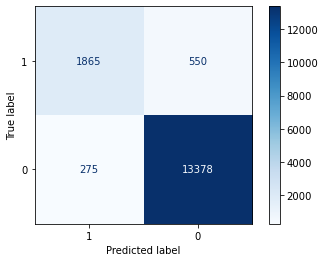

In [30]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.show()

In [31]:
print(f1_score(y_test, y_test_pred))

0.8188803512623491


In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13653
           1       0.87      0.77      0.82      2415

    accuracy                           0.95     16068
   macro avg       0.92      0.88      0.89     16068
weighted avg       0.95      0.95      0.95     16068



In [33]:
probabilities_train = knn.predict_proba(X_train)

In [34]:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(knn.classes_)))

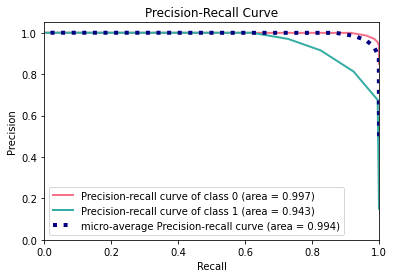

In [35]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

In [36]:
print('Average precision score: ', average_precision_score(y_train, probabilities_train[:, 1]))

Average precision score:  0.9432077909952539


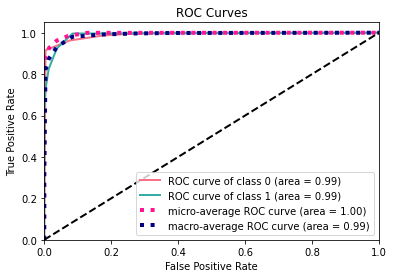

In [37]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

In [38]:
print('Area under the curve : ', roc_auc_score(y_train, probabilities_train[:, 1]))

Area under the curve :  0.9898582434855276


Unfortunately with the KNN model, it is not possible to get the feature importances due to how the model works.